In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import numpy as np
import statsmodels.api as sm
from matplotlib.ticker import MaxNLocator
from matplotlib.dates import (FR, MO, MONTHLY, SA, SU, TH, TU, WE,
                              AutoDateFormatter, AutoDateLocator,
                              ConciseDateFormatter, DateFormatter, DayLocator,
                              HourLocator, MicrosecondLocator, MinuteLocator,
                              MonthLocator, RRuleLocator, SecondLocator,
                              WeekdayLocator, YearLocator, rrulewrapper)
import matplotlib.ticker as ticker

import matplotlib.dates as mdates

In [3]:
# cars in munich 31.12.23
kfz_total=753851



kfz_e=34371.0/kfz_total
kfz_h=102616.0/kfz_total
kfz_k=136987.0/kfz_total

68311*kfz_k

12413.220857967955

In [4]:
df_Ladesaeulenregister_mit_Bezirk=pd.read_csv('../data/Ladesaeulenregister_mit_Bezirk.csv')
df_Ladesaeulenregister_with_Stadtbezirk=pd.read_csv('../data/Ladesaeulenregister_with_Stadtbezirk.csv')
df_MUC_Bezirke_Einwohner_georg=pd.read_csv('../data/MUC_Bezirke_Einwohner_georg.csv')
df_population_munich_2023=pd.read_csv('../data/population_munich_2023.csv')
df_vehicle_population_munich_2023=pd.read_csv('../data/vehicle_population_munich_2023.csv')

In [29]:
df_vehicle_population_munich_2023[['Stadtbezirk','Personenkraftwagen']]

,Stadtbezirk,Personenkraftwagen
0,1 Altstadt - Lehel,68311
1,2 Ludwigsvorstadt - Isarvorstadt,16861
2,3 Maxvorstadt,25488
3,4 Schwabing West,22743
4,5 Au - Haidhausen,19839
5,6 Sendling,29444
6,7 Sendling - Westpark,26358
7,8 Schwanthalerhöhe,11722
8,9 Neuhausen - Nymphenburg,36650
9,10 Moosach,26093


In [6]:
df_car_per_dist=df_vehicle_population_munich_2023.copy()
df_car_per_dist=df_car_per_dist[['Stadtbezirk','Personenkraftwagen']]
df_car_per_dist['e-kfz']=round((df_car_per_dist['Personenkraftwagen']*kfz_k))

In [7]:
df_car_per_dist

,Stadtbezirk,Personenkraftwagen,e-kfz
0,1 Altstadt - Lehel,68311,12413.0
1,2 Ludwigsvorstadt - Isarvorstadt,16861,3064.0
2,3 Maxvorstadt,25488,4632.0
3,4 Schwabing West,22743,4133.0
4,5 Au - Haidhausen,19839,3605.0
5,6 Sendling,29444,5350.0
6,7 Sendling - Westpark,26358,4790.0
7,8 Schwanthalerhöhe,11722,2130.0
8,9 Neuhausen - Nymphenburg,36650,6660.0
9,10 Moosach,26093,4742.0


In [78]:
#save dataframe tocsv
df_car_per_dist.to_csv("../data/df_ratio_cars_dist.csv")

In [25]:
print(df_MUC_Bezirke_Einwohner_georg)

    Bezirk                                        Bezirksname  Fläche  \
0        1                                     Altstadt-Lehel    3.15   
1        2                       Ludwigsvorstadt-Isarvorstadt    4.40   
2        3                                        Maxvorstadt    4.30   
3        4                                     Schwabing-West    4.36   
4        5                                      Au-Haidhausen    4.22   
5        6                                           Sendling    3.94   
6        7                                  Sendling-Westpark    7.81   
7        8                                   Schwanthalerhöhe    2.07   
8        9                              Neuhausen-Nymphenburg   12.91   
9       10                                            Moosach   11.09   
10      11                              Milbertshofen-Am Hart   13.42   
11      12                                 Schwabing-Freimann   25.67   
12      13                                        B

In [13]:
print(df_Ladesaeulenregister_with_Stadtbezirk[['Stadtbezirk','Anzahl Ladepunkte']])
df_L=df_Ladesaeulenregister_with_Stadtbezirk.groupby('Stadtbezirk')['Anzahl Ladepunkte'].sum().reset_index()

      Stadtbezirk  Anzahl Ladepunkte
0            21.0                  2
1            21.0                  2
2            21.0                  2
3            22.0                  2
4             1.0                  1
...           ...                ...
1614         19.0                  4
1615          NaN                  2
1616          NaN                  2
1617          NaN                  2
1618          NaN                  2

[1619 rows x 2 columns]


In [14]:
df_car_per_dist['Ladestationen']=df_L['Anzahl Ladepunkte']

In [15]:
df_car_per_dist1=df_car_per_dist.copy()
df_car_per_dist1

,Stadtbezirk,Personenkraftwagen,e-kfz,Ladestationen
0,1 Altstadt - Lehel,68311,12413.0,75
1,2 Ludwigsvorstadt - Isarvorstadt,16861,3064.0,62
2,3 Maxvorstadt,25488,4632.0,85
3,4 Schwabing West,22743,4133.0,66
4,5 Au - Haidhausen,19839,3605.0,68
5,6 Sendling,29444,5350.0,38
6,7 Sendling - Westpark,26358,4790.0,62
7,8 Schwanthalerhöhe,11722,2130.0,26
8,9 Neuhausen - Nymphenburg,36650,6660.0,142
9,10 Moosach,26093,4742.0,70


In [17]:
df_car_per_dist1=df_car_per_dist1[['Stadtbezirk','e-kfz','Ladestationen']]
df_car_per_dist1.Ladestationen.sum()

2414

/var/folders/_d/w0ggzlf57p52h9zgps98ymqm0000gn/T/ipykernel_72385/363807859.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90);


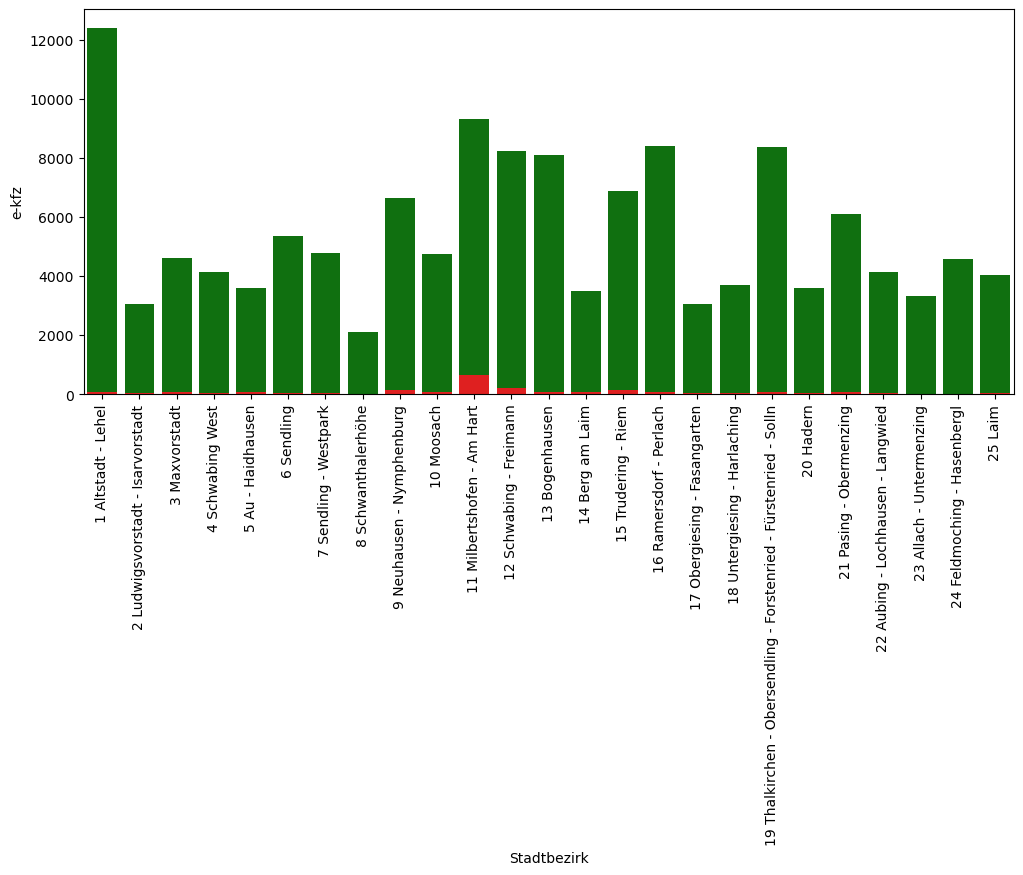

In [71]:
fig, ax = plt.subplots(figsize=(12, 5))
my_plot=sns.barplot(df_car_per_dist1, x='Stadtbezirk', y='e-kfz', color='g' )
my_plot=sns.barplot(df_car_per_dist1, x='Stadtbezirk', y='Ladestationen', color='r' )
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90);

In [94]:
df_car_per_dist1['Ratio'] = df_car_per_dist1['e-kfz'] / df_car_per_dist1['Ladestationen']

#print(df_car_per_dist1)
#datas=df_car_per_dist1.pivot('Stadtbezirk', 'Ratio', 'Ladestationen')
pivot_df = df_car_per_dist1.pivot_table(index='Stadtbezirk', columns='Ladestationen', values='Ratio')
print(pivot_df)

Ladestationen                                         10         26   \
Stadtbezirk                                                            
1 Altstadt - Lehel                                    NaN        NaN   
10 Moosach                                            NaN        NaN   
11 Milbertshofen - Am Hart                            NaN        NaN   
12 Schwabing - Freimann                               NaN        NaN   
13 Bogenhausen                                        NaN        NaN   
14 Berg am Laim                                       NaN        NaN   
15 Trudering - Riem                                   NaN        NaN   
16 Ramersdorf - Perlach                               NaN        NaN   
17 Obergiesing - Fasangarten                          NaN        NaN   
18 Untergiesing - Harlaching                          NaN        NaN   
19 Thalkirchen - Obersendling - Forstenried - F...    NaN        NaN   
2 Ludwigsvorstadt - Isarvorstadt                      NaN       

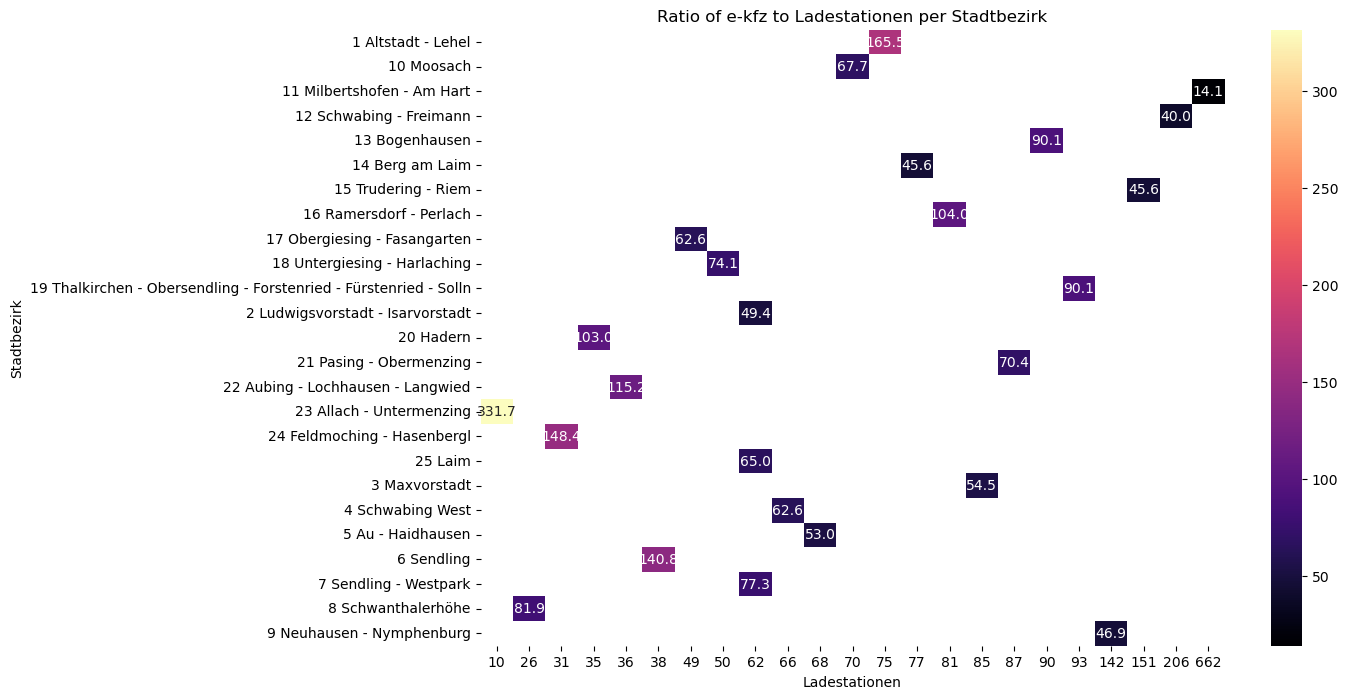

In [99]:
# Plotting the heatmap

plt.figure(figsize=(12, 8)) 
sns.heatmap(data=pivot_df, annot=True, fmt=".1f", cmap='magma')
plt.title('Ratio of e-kfz to Ladestationen per Stadtbezirk')
plt.show()